<a href="https://colab.research.google.com/github/Antero0714/MarketPro/blob/master/CameraCalibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import glob
import numpy as np
from google.colab import files
import os

# Minimum of 10 images
uploaded = files.upload()
os.makedirs('chessboard_images', exist_ok=True)

for filename in uploaded.keys():
    os.rename(filename, os.path.join('chessboard_images', filename))

# Specify the size of the chessboard
chessboard_size = (8, 5)
square_size = 2.0

objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)
objp *= square_size

objpoints = []
imgpoints = []

images = glob.glob('chessboard_images/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

# mtx - camera matrix
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

Saving WIN_20251116_20_37_57_Pro.jpg to WIN_20251116_20_37_57_Pro (1).jpg
Saving WIN_20251116_20_38_36_Pro.jpg to WIN_20251116_20_38_36_Pro (1).jpg
Saving WIN_20251116_20_38_46_Pro.jpg to WIN_20251116_20_38_46_Pro (1).jpg
Saving WIN_20251116_20_39_05_Pro.jpg to WIN_20251116_20_39_05_Pro (1).jpg
Saving WIN_20251116_20_39_30_Pro.jpg to WIN_20251116_20_39_30_Pro (1).jpg
Saving WIN_20251116_20_39_46_Pro.jpg to WIN_20251116_20_39_46_Pro (1).jpg
Saving WIN_20251116_20_40_12_Pro.jpg to WIN_20251116_20_40_12_Pro (1).jpg
Saving WIN_20251116_20_40_27_Pro.jpg to WIN_20251116_20_40_27_Pro (1).jpg
Saving WIN_20251116_20_40_40_Pro.jpg to WIN_20251116_20_40_40_Pro (1).jpg
Saving WIN_20251116_20_44_08_Pro.jpg to WIN_20251116_20_44_08_Pro (1).jpg


In [4]:
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-python==4.6.0.66 opencv-contrib-python==4.6.0.66
print(cv2.__version__)

Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
Found existing installation: opencv-contrib-python 4.12.0.88
Uninstalling opencv-contrib-python-4.12.0.88:
  Successfully uninstalled opencv-contrib-python-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.0 MB/s eta 0:00:00


4.12.0


Saving 5341614881910153462.jpg to 5341614881910153462 (8).jpg
Marker ID: 1, Distance: 0.07 meters
Marker ID: 0, Distance: 0.07 meters
Marker ID: 3, Distance: 0.07 meters
Marker ID: 1, tvec: [[-0.05  0.05  0.  ]], Distance: 0.07 meters
Marker ID: 0, tvec: [[-0.05  0.05  0.  ]], Distance: 0.07 meters
Marker ID: 3, tvec: [[-0.05  0.05  0.  ]], Distance: 0.07 meters


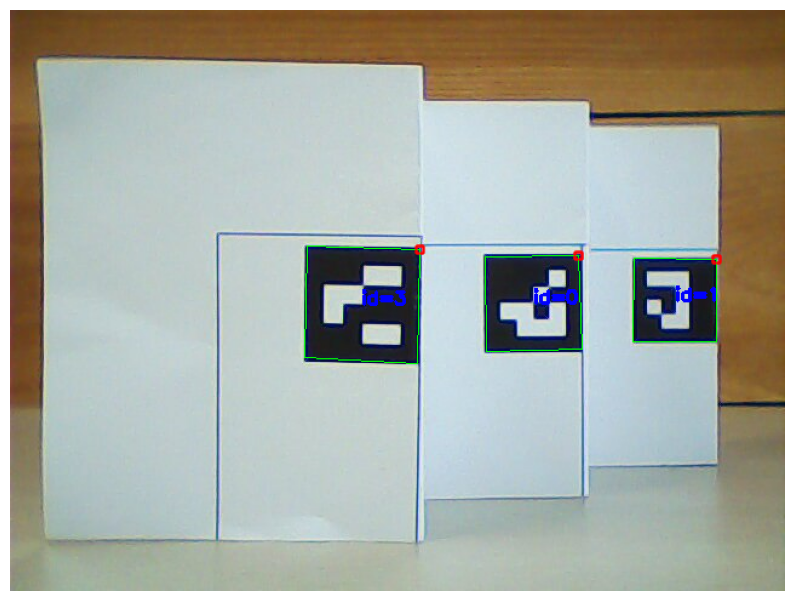

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

image_filename = list(uploaded.keys())[0]
image = cv2.imread(image_filename)

fx = 800
fy = 800
cx = image.shape[1] / 2
cy = image.shape[0] / 2

camera_matrix = np.array([[fx, 0, cx],
                           [0, fy, cy],
                           [0, 0, 1]], dtype=np.float32)

# Marker size m
marker_size = 0.1

# ArUco Dictionary
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters_create()

corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image, aruco_dict, parameters=parameters)

if ids is not None:
    cv2.aruco.drawDetectedMarkers(image, corners, ids)

    for i in range(len(ids)):
        corner = corners[i][0]

        marker_corners = np.array([[0, 0, 0],
                                    [marker_size, 0, 0],
                                    [marker_size, marker_size, 0],
                                    [0, marker_size, 0]], dtype=np.float32)

        retval, rvec, tvec = cv2.aruco.estimatePoseSingleMarkers(corners[i], marker_size, camera_matrix, None)

        cv2.aruco.drawDetectedMarkers(image, corners, ids)

        if retval is not None and len(rvec) > 0 and len(tvec) > 0:
            distance = np.linalg.norm(tvec[0])
            print(f'Marker ID: {ids[i][0]}, Distance: {distance:.2f} meters')

Saving 5341614881910153462.jpg to 5341614881910153462 (5).jpg
Distance to marker 1: 0.29 meters
Distance to marker 0: 0.26 meters
Distance to marker 3: 0.21 meters


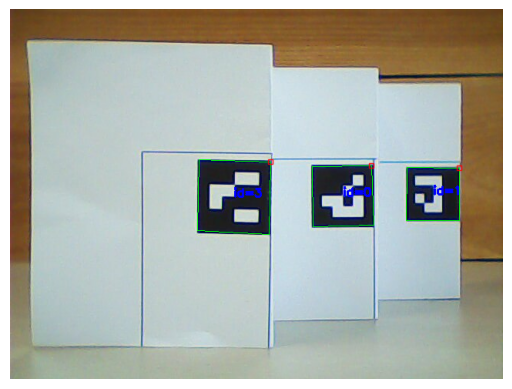

In [ ]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

focal_length = 800  # Фокусное расстояние в пикселях
marker_length = 0.025  # Длина стороны маркера в метрах

image_path = list(uploaded.keys())[0]
frame = cv2.imread(image_path)

aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_4X4_250)
parameters = cv2.aruco.DetectorParameters_create()

corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(frame, aruco_dict, parameters=parameters)

if ids is not None:
    cv2.aruco.drawDetectedMarkers(frame, corners, ids)
    for i in range(len(ids)):
        corner = corners[i][0]
        width = np.linalg.norm(corner[0] - corner[1])
        distance = (marker_length * focal_length) / width
        print(f"Distance to marker {ids[i][0]}: {distance:.2f} meters")

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()
